In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import exp, sin, arange, asarray
from scipy.optimize import curve_fit
from blablaplot import TextyPloty, ResidualsPlot

Define a function to plot the text around:

In [3]:
def f(x, a, b):
    return a*exp(-x) * sin(5*b*x)

This actually generates the X and Y arrays for the data points.

In [4]:
a = TextyPloty(
    spacing=0.2, 
    offset=(0.1, -0.05), 
    scale=(0.5, 0.1), 
    func=lambda x: f(x, 10, 1), 
    jitter=0.0
)

xs, ys = a.get('hello world !')

Now we fit the function to the data we generated

In [6]:
popt, pcov = curve_fit(f, xs, ys)
xs_fit = arange(min(xs), max(xs), 0.01)
ys_fit = asarray(f(xs_fit, popt[0], popt[1]))

PLOT IT

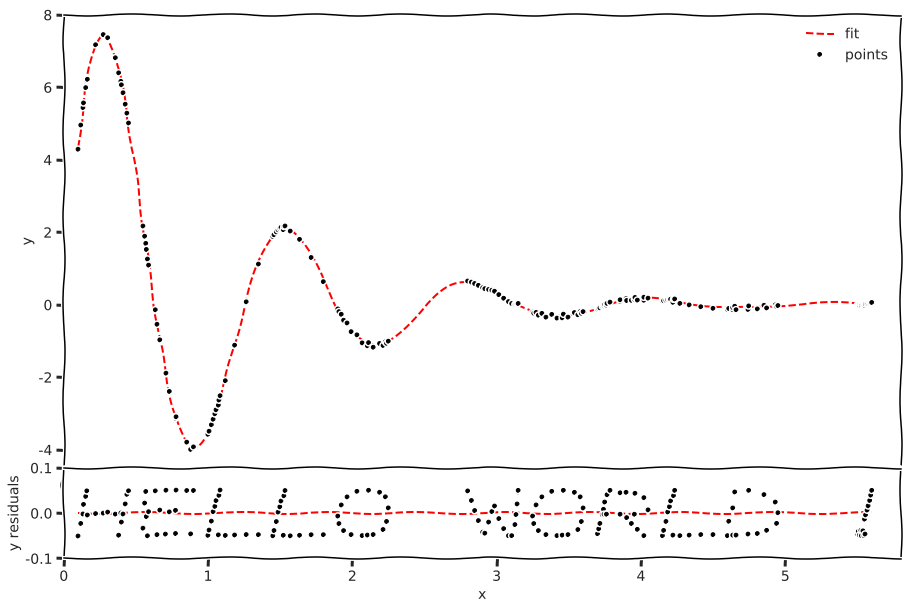

In [10]:
plotter = ResidualsPlot(data=(xs, ys), 
                        datastyle='k.', 
                        xs_fit=xs_fit, 
                        func=lambda x: f(x, popt[0], popt[1]), 
                        fitstyle='r--'
                       )
plotter.figsize = (15, 10)
plotter.xlabel = 'x'
plotter.ylabel = 'y'
plotter.reslabel = 'y residuals'
plotter.ratio = (5,1)
plotter.axis = (0, 5.8, -4.5, 8)
plotter.res_axis = (0, 5.8, -0.1, 0.1)
plotter.plt_instance.xkcd()
plotter.draw()
plotter.show()